# Mean-field simulations of mean- vs fluctuation-driven rate chaos

## Dynamics

$$\alpha_r\left(\Theta^t\right) = 
\int_{x}\mathcal{N}\left(x; \mu_r, \sigma_r\right) \prod_{r'\neq r} \Phi\left(x; \mu_{r'}, \sigma_{r'}\right)$$

$$\mu_r = R \sum_{r'} \mu_J(r,r') \Theta_{r'}^t + u_r^t \quad \quad \sigma^2_r = R \sum_{r'} \sigma_J^2(r,r') \Theta_{r'}^t + v_r^t$$

Infinite networks

$$\Theta^{t+1} = \boldsymbol{\alpha}(\Theta^t)$$

Finite networks

$$N\Theta^{t+1} \sim \textrm{Multinomial}\left(\boldsymbol{\alpha}(\Theta^t), N\right)$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys

from disp import set_plot

In [2]:
# numeric params for computing MF quantities
DX = .05
X_MIN = -20
X_MAX = 20

X = np.linspace(X_MIN, X_MAX, int((X_MAX-X_MIN)/DX)+1)

def norm(x, mu, sgm):
    return stats.norm.pdf(x, loc=mu, scale=sgm)

def phi(x, mu, sgm):
    return stats.norm.cdf(x, loc=mu, scale=sgm)

def alph(th, u, v, R, mu_j, sgm_j):
    """
    th \in [0, 1]^R
    u \in R^R
    v \in R_+^r
    R scalar
    mus \in R^{RxR}
    gams \in R^{RxR}
    """
    mu_r = R*(mu_j @ th) + u
    sgm_r = np.sqrt(R*((sgm_j**2)@th) + v)
    
    phis = np.array([phi(X, mu_r_, sgm_r_) for mu_r_, sgm_r_ in zip(mu_r, sgm_r)])
    
    mnot_r = ~np.eye(len(th), dtype=bool) # masks for selecting all but one r
    
    th_next = np.nan*np.zeros(R)
    for r, (mu_r_, sgm_r_) in enumerate(zip(mu_r, sgm_r)):
        
        mask_r = mnot_r[r]
        th_next[r] = np.sum(norm(X, mu_r_, sgm_r_) * np.prod(phis[mask_r, :], axis=0))*DX
        
    return th_next


# Random variance couplings

In [3]:
R = 500

mself = np.eye(R, dtype=bool)

MU_J = np.nan*np.zeros((R, R))

MU_J[mself] = 0
MU_J[~mself] = 0

SGM_J = np.zeros((R, R))
SGM_J[mself] = 1

for r in range(R):
    choices = list(range(R))
    choices.pop(r)
    idxs = np.random.choice(choices, 5)
    SGM_J[r, idxs] = .5

......

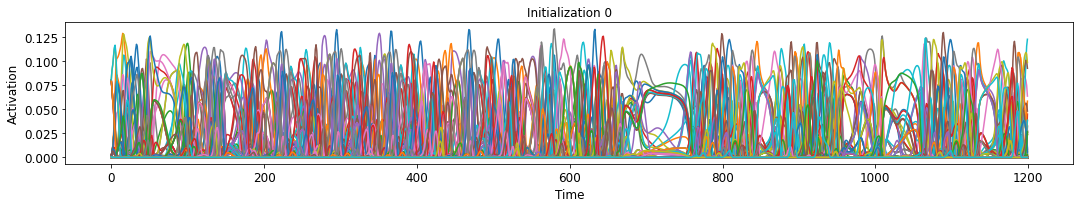

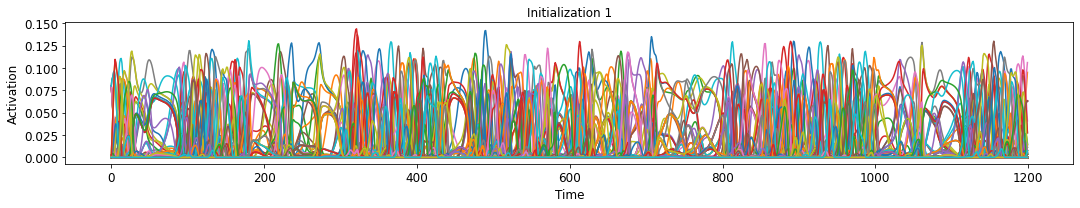

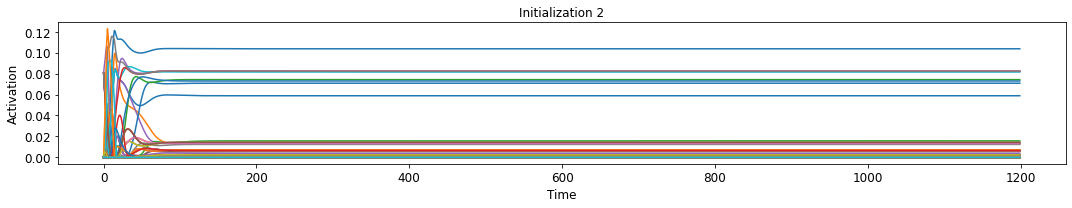

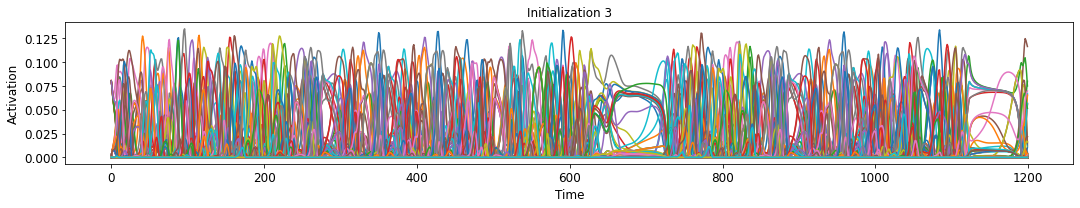

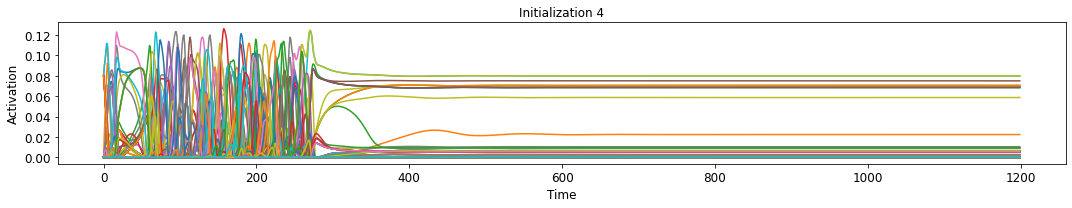

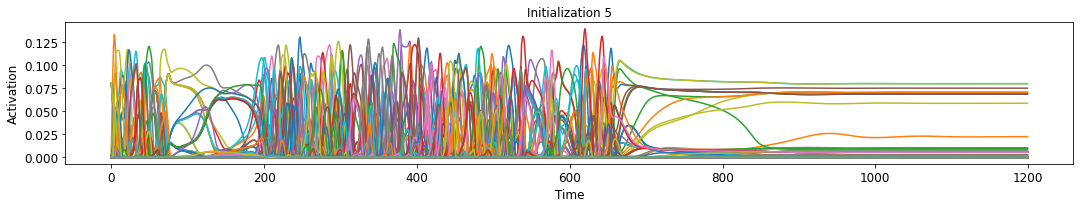

In [4]:
t_max = 1200
t = np.arange(t_max)

for ctr in range(6):
    sys.stdout.write('.')

    # th_0 = np.random.rand(R)
    th_0 = np.random.rand(R)*.01
    th_0[np.random.permutation(R)[:10]] += 1
    th_0 /= th_0.sum()

    ths = np.nan*np.zeros((t_max, R))
    ths[0, :] = th_0

    for t_ in t[1:]:
        ths[t_, :] = alph(ths[t_-1, :], u=0, v=0, R=R, mu_j=MU_J, sgm_j=SGM_J)

    fig, ax = plt.subplots(1, 1, figsize=(15, 3), tight_layout=True)
    ax.plot(t, ths)
    set_plot(ax, x_label='Time', y_label='Activation', title=f'Initialization {ctr}')

## Random mean couplings

In [5]:
R = 300

mself = np.eye(R, dtype=bool)

MU_J = np.nan*np.zeros((R, R))
SGM_J = np.nan*np.zeros((R, R))

MU_J[mself] = 0
MU_J[~mself] = 0

MU_J = np.random.randn(R, R)*.03

SGM_J[mself] = 1
SGM_J[~mself] = .01

..

KeyboardInterrupt: 

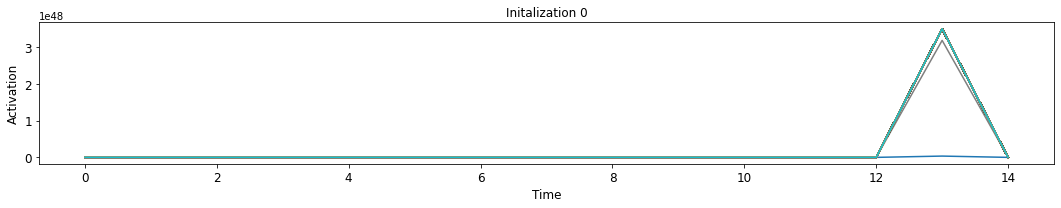

In [6]:
t_max = 500
t = np.arange(t_max)

for ctr in range(6):
    sys.stdout.write('.')

    th_0 = np.random.rand(R)
    th_0 /= th_0.sum()

    ths = np.nan*np.zeros((t_max, R))
    ths[0, :] = th_0

    for t_ in t[1:]:
        ths[t_, :] = alph(ths[t_-1, :], u=0, v=0, R=R, mu_j=MU_J, sgm_j=SGM_J)

    fig, ax = plt.subplots(1, 1, figsize=(15, 3), tight_layout=True)
    ax.plot(t, ths)
    set_plot(ax, x_label='Time', y_label='Activation', title=f'Initalization {ctr}')